## Sentiment Analysis Using with BERT

In [6]:
# import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# load the dataset
df_train = pd.read_csv('/content/Sentiment6.csv')

In [8]:
# first 5 records
df_train.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [9]:
# number of rows and number of columns
df_train.shape

(6000, 9)

In [10]:
# find the datatype of each feature
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            6000 non-null   object
 1   helpful         6000 non-null   object
 2   overall         6000 non-null   int64 
 3   reviewText      6000 non-null   object
 4   reviewTime      6000 non-null   object
 5   reviewerID      6000 non-null   object
 6   reviewerName    6000 non-null   object
 7   summary         6000 non-null   object
 8   unixReviewTime  6000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 422.0+ KB


### Exploratory Data Analysis and Visualization

In [11]:
# find the value counts of 'overall' feature
df_train['overall'].value_counts()

5    2830
4    1732
3     829
2     354
1     255
Name: overall, dtype: int64

In [12]:
# normalization of 'overall' feature 
df_train['overall'].value_counts(normalize=True)

5    0.471667
4    0.288667
3    0.138167
2    0.059000
1    0.042500
Name: overall, dtype: float64

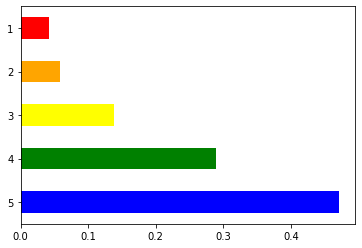

In [13]:
# bar plot of 'overall' feature 
df_train['overall'].value_counts(normalize=True).plot(kind='barh',color=['blue','green','yellow','orange','red'])

In [14]:
# import datetime library
from datetime import datetime

In [15]:
# date time feature
df_train['Date'] = pd.to_datetime(df_train['reviewTime']).dt.date

In [16]:
# first 5 records
df_train

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19
...,...,...,...,...,...,...,...,...,...,...
5995,B002HMCLFQ,"[1, 2]",4,"As I read this, I found myself trying to guess...","04 1, 2010",A3IF9GAIGNVBMZ,"George Angus ""Tumblemoose""",Crazy fun,1270080000,2010-04-01
5996,B002HMCLFQ,"[5, 6]",5,"If you like a good action/thriller, certainly ...","02 4, 2011",A2NXSAC8H7YKI3,JDullens,"You'll like it, unless you're some kind of par...",1296777600,2011-02-04
5997,B002HMCLFQ,"[0, 0]",4,This was a different read for me. For the mos...,"07 17, 2013",A335AIY6JYXZ6V,Kathy Gisi,Crack up,1374019200,2013-07-17
5998,B002HMCLFQ,"[3, 4]",5,Argus Ward's struggle to separate reality from...,"09 29, 2009",A27B2D6STG2Q6H,KayeKaye,"Very, very good!",1254182400,2009-09-29


In [17]:
# number of months in the feature
df_train['month'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.month

In [18]:
# month feature distribution
df_train['month']

0       5
1       1
2       4
3       2
4       3
       ..
5995    4
5996    2
5997    7
5998    9
5999    8
Name: month, Length: 6000, dtype: int64

In [19]:
# extrcting the 'day' feature
df_train['day'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.day

In [20]:
# distribution of 'day' feature
df_train['day']

0        5
1        6
2        4
3       19
4       19
        ..
5995     1
5996     4
5997    17
5998    29
5999    11
Name: day, Length: 6000, dtype: int64

In [21]:
# extracting 'year' feature in datetime feature
df_train['year'] = pd.to_datetime(df_train['Date'], format='%Y/%m/%d').dt.year

In [22]:
# distirbution of 'year' feature
df_train['year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
5995    2010
5996    2011
5997    2013
5998    2009
5999    2009
Name: year, Length: 6000, dtype: int64

In [23]:
# first 5 records
df_train

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,month,day,year
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05,5,5,2014
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06,1,6,2014
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04,4,4,2014
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19,2,19,2014
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19,3,19,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,B002HMCLFQ,"[1, 2]",4,"As I read this, I found myself trying to guess...","04 1, 2010",A3IF9GAIGNVBMZ,"George Angus ""Tumblemoose""",Crazy fun,1270080000,2010-04-01,4,1,2010
5996,B002HMCLFQ,"[5, 6]",5,"If you like a good action/thriller, certainly ...","02 4, 2011",A2NXSAC8H7YKI3,JDullens,"You'll like it, unless you're some kind of par...",1296777600,2011-02-04,2,4,2011
5997,B002HMCLFQ,"[0, 0]",4,This was a different read for me. For the mos...,"07 17, 2013",A335AIY6JYXZ6V,Kathy Gisi,Crack up,1374019200,2013-07-17,7,17,2013
5998,B002HMCLFQ,"[3, 4]",5,Argus Ward's struggle to separate reality from...,"09 29, 2009",A27B2D6STG2Q6H,KayeKaye,"Very, very good!",1254182400,2009-09-29,9,29,2009


In [24]:
# discription of 'overall' feature 
df_train['overall'].describe()

count    6000.000000
mean        4.088000
std         1.104895
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

In [25]:
# distribution of 'Date' feature 
df_train['Date'].value_counts()

2013-02-18    22
2013-05-19    20
2013-02-28    16
2013-02-13    16
2012-12-05    15
              ..
2009-04-10     1
2009-03-27     1
2009-03-24     1
2009-11-03     1
2009-09-29     1
Name: Date, Length: 1787, dtype: int64

In [26]:
# first 15 records of 'Date' feature
df_train['Date'].value_counts()[:15]

2013-02-18    22
2013-05-19    20
2013-02-28    16
2013-02-13    16
2012-12-05    15
2012-09-06    15
2013-02-21    14
2014-01-12    13
2013-05-29    13
2014-03-30    13
2013-12-28    12
2013-02-25    12
2013-01-04    12
2012-12-20    12
2013-03-09    12
Name: Date, dtype: int64

In [27]:
#distribution of 'Date' feature
df_train['Date'].value_counts(ascending=True)

2009-09-29     1
2009-01-07     1
2008-06-03     1
2010-08-15     1
2011-03-27     1
              ..
2012-09-06    15
2013-02-28    16
2013-02-13    16
2013-05-19    20
2013-02-18    22
Name: Date, Length: 1787, dtype: int64

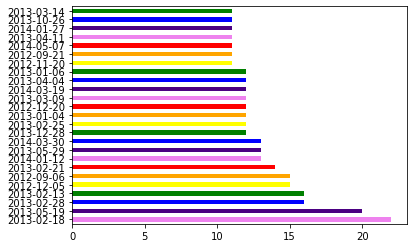

In [28]:
#bar plot of 'Date' feature
df_train['Date'].value_counts()[:25].plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


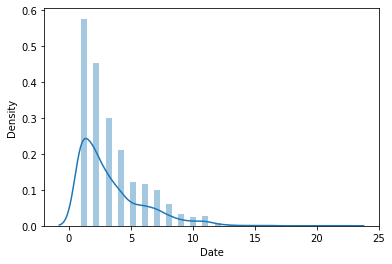

In [29]:
# distplot of 'Date' feature
sns.distplot(df_train['Date'].value_counts())

In [30]:
#distribution of 'year' feature 
df_train['year'].value_counts()

2013    2086
2012    1093
2014     984
2011     715
2010     589
2009     375
2008     135
2007      15
2006       3
2005       2
2002       1
2001       1
2000       1
Name: year, dtype: int64

In [31]:
# normalizationof 'year' feature
df_train['year'].value_counts(normalize=True)

2013    0.347667
2012    0.182167
2014    0.164000
2011    0.119167
2010    0.098167
2009    0.062500
2008    0.022500
2007    0.002500
2006    0.000500
2005    0.000333
2002    0.000167
2001    0.000167
2000    0.000167
Name: year, dtype: float64

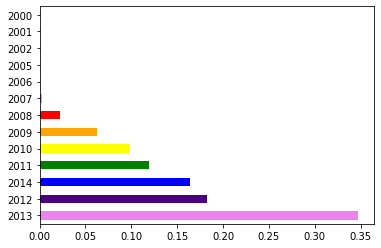

In [32]:
#bar plot of 'year' feature
df_train['year'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

In [33]:
# distinct values of 'month' feature
df_train['month'].value_counts()

3     624
1     623
2     619
5     605
4     543
6     532
12    460
7     447
11    403
9     395
10    376
8     373
Name: month, dtype: int64

In [34]:
#naormalization of 'month' feature
df_train['month'].value_counts(normalize=True)

3     0.104000
1     0.103833
2     0.103167
5     0.100833
4     0.090500
6     0.088667
12    0.076667
7     0.074500
11    0.067167
9     0.065833
10    0.062667
8     0.062167
Name: month, dtype: float64

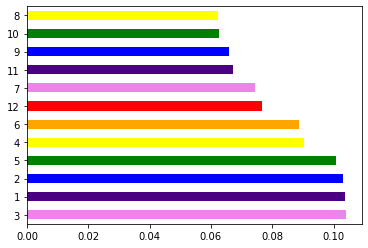

In [35]:
# bar plot of 'month' feature
df_train['month'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

In [36]:
# distinct values of 'day' feature
df_train['day'].value_counts()

26    229
6     228
19    220
5     219
4     216
23    213
21    212
1     211
11    209
7     207
10    207
13    201
9     201
2     199
18    198
12    197
22    196
20    196
16    191
17    190
27    189
29    187
15    184
24    182
28    180
8     177
14    176
25    163
30    161
3     157
31    104
Name: day, dtype: int64

In [37]:
# normalization of 'day' feature
df_train['day'].value_counts(normalize=True)

26    0.038167
6     0.038000
19    0.036667
5     0.036500
4     0.036000
23    0.035500
21    0.035333
1     0.035167
11    0.034833
7     0.034500
10    0.034500
13    0.033500
9     0.033500
2     0.033167
18    0.033000
12    0.032833
22    0.032667
20    0.032667
16    0.031833
17    0.031667
27    0.031500
29    0.031167
15    0.030667
24    0.030333
28    0.030000
8     0.029500
14    0.029333
25    0.027167
30    0.026833
3     0.026167
31    0.017333
Name: day, dtype: float64

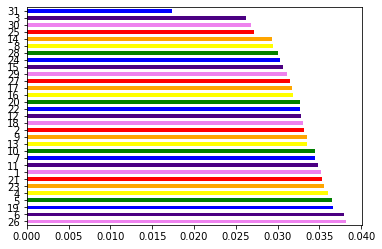

In [38]:
#barplot of 'day' feature
df_train['day'].value_counts(normalize=True).plot(kind='barh',color=['violet','indigo','blue','green','yellow','orange','red'])

In [39]:
#adding 'reviewText' and 'summary' features
df_train["text"] = df_train["reviewText"] + df_train["summary"]

In [40]:
#fisrt record of 'text' feature
df_train['text'][0]

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.Nice vintage story"

In [41]:
# first record of 'reviewText' feature
df_train['reviewText'][0]

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me."

In [42]:
# For cleaning the data
df_train['text'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [43]:
# all records of 'text' feature
df_train['text']

0       I enjoy vintage books and movies so I enjoyed ...
1       This book is a reissue of an old one  the auth...
2       This was a fairly interesting read   It had ol...
3       I d never read any of the Amy Brewster mysteri...
4       If you like period pieces   clothing  lingo  y...
                              ...                        
5995    As I read this  I found myself trying to guess...
5996    If you like a good action thriller  certainly ...
5997    This was a different read for me   For the mos...
5998    Argus Ward s struggle to separate reality from...
5999    I saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [44]:
# lowering the all records
df_train['text'].str.lower()

0       i enjoy vintage books and movies so i enjoyed ...
1       this book is a reissue of an old one  the auth...
2       this was a fairly interesting read   it had ol...
3       i d never read any of the amy brewster mysteri...
4       if you like period pieces   clothing  lingo  y...
                              ...                        
5995    as i read this  i found myself trying to guess...
5996    if you like a good action thriller  certainly ...
5997    this was a different read for me   for the mos...
5998    argus ward s struggle to separate reality from...
5999    i saw a really enthusiastic review    stars  f...
Name: text, Length: 6000, dtype: object

In [45]:
# string format of first record
df_train['text'].str.lower()[0]

'i enjoy vintage books and movies so i enjoyed reading this book   the plot was unusual   don t think killing someone in self defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today still it was a good read for me nice vintage story'

In [46]:
# converting all to string format
df_train['Text'] = df_train['text'].str.lower()

In [47]:
# unique values of 'overall' feature
df_train['overall'].unique()

array([5, 4, 3, 2, 1])

In [48]:
# converting all values which are less than 4 becomes to 0
df_train['overall'] = np.where(df_train['overall'] <= 4 , 0, df_train['overall'])

In [49]:
#converting all values greater than 4 becomes to 1
df_train['overall'] = np.where(df_train['overall'] > 4 , 1, df_train['overall'])

In [50]:
# value count of 'overall' feature
df_train['overall'].value_counts()

0    3170
1    2830
Name: overall, dtype: int64

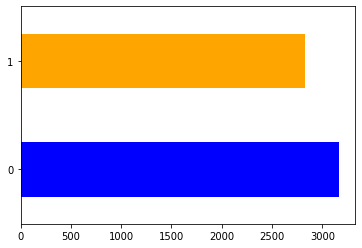

In [51]:
# bar plot of 'overall' feature
df_train['overall'].value_counts().plot(kind='barh',color=['blue','orange'])

In [52]:
# normalization count of 'overall' feature
df_train['overall'].value_counts(normalize=True)

0    0.528333
1    0.471667
Name: overall, dtype: float64

In [53]:
# sepating 'Text' and 'overall' feature
df = df_train[['Text','overall']]

In [54]:
# first 5 records of the dataframe
df.head()

,Text,overall
0,i enjoy vintage books and movies so i enjoyed ...,1
1,this book is a reissue of an old one the auth...,0
2,this was a fairly interesting read it had ol...,0
3,i d never read any of the amy brewster mysteri...,1
4,if you like period pieces clothing lingo y...,0


In [55]:
# separating the dependent and idependent features
X = df['Text']
y = df['overall']

In [56]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [57]:
# install the transformers library
!pip install transformers
import pandas as pd
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
pd.set_option('display.max_colwidth', None)
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
BATCH_SIZE = 16
N_EPOCHS = 3

     |████████████████████████████████| 3.5 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 596 kB 48.3 MB/s 
     |████████████████████████████████| 6.8 MB 34.5 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [58]:
#define a tokenizer object
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenize the text
train_encodings = tokenizer(list(X_train.values),
                            truncation=True, 
                            padding=True)
test_encodings = tokenizer(list(X_test.values),
                           truncation=True, 
                           padding=True)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

In [59]:
# import the dataset from tensorflow library
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                    list(y_train.values)))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                    list(y_test.values)))

In [60]:
# extract the model from BERT
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)
#chose the optimizer
optimizerr = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model
model.compile(optimizer=optimizerr,
              loss=losss,
              metrics=['accuracy'])
# train the model 
model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE),
          epochs=N_EPOCHS,
          batch_size=BATCH_SIZE)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Epoch 1/3
300/300 [==============================] - 530s 2s/step - loss: 0.5394 - accuracy: 0.7433
Epoch 2/3
300/300 [==============================] - 516s 2s/step - loss: 0.3788 - accuracy: 0.8290
Epoch 3/3
300/300 [==============================] - 516s 2s/step - loss: 0.2577 - accuracy: 0.8913


## Model evaluation.

In [61]:
# model evaluation on the test set
model.evaluate(test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE), 
               return_dict=True, 
               batch_size=BATCH_SIZE)


75/75 [==============================] - 47s 600ms/step - loss: 0.5568 - accuracy: 0.7700


{'accuracy': 0.7699999809265137, 'loss': 0.556776225566864}

In [62]:
# define a function for tokenization
def predict_proba(text_list, model, tokenizer):  
    #tokenize the text
    encodings = tokenizer(text_list, 
                          max_length=128, 
                          truncation=True, 
                          padding=True)
    #transform to tf.Dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings)))
    #predict
    preds = model.predict(dataset.batch(1)).logits  
    
    #transform to array with probabilities
    res = tf.nn.softmax(preds, axis=1).numpy()      
    
    return res

In [63]:
# test text  for predicting the accuracy of our build model 
strings_list =["""
                  1 pound green beans, trimmed
                  ½ head radicchio, sliced into strips
                  Scant ¼ cup thinly sliced red onion
                  Honey Mustard Dressing, for drizzling
                  2 ounces goat cheese
                  2 tablespoons chopped walnuts
                  2 tablespoons sliced almonds
                  ¼ cup tarragon
                  Flaky sea salt""",
               """Bring a large pot of salted water to a boil and                  set a bowl of ice water nearby. Drop the green beans into the boiling water and blanch for 2 minutes. Remove the beans and immediately immerse in the ice water long enough to cool completely, about 15 seconds. Drain and place on paper towels to dry. """,
               """Transfer the beans to a bowl and toss with the radicchio, onion, and a few spoonfuls of the dressing.""",
               """Arrange on a platter and top with small dollops of goat cheese, the walnuts, almonds, and tarragon. Drizzle with more dressing, season to taste with flaky salt, and serve."""]

In [64]:
# Accuracy of the model
predict_proba(strings_list, model, tokenizer)

array([[0.9414762 , 0.0585238 ],
       [0.55972344, 0.44027656],
       [0.57814944, 0.42185062],
       [0.9422584 , 0.05774165]], dtype=float32)